# Logic Gates Visualization

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

import sys
sys.path.append("../")
from biologiclib.modelBase import *
from biologiclib.plotUtils import *
from biologiclib.inference import *
from rm_outlier import *

%matplotlib inline

In [2]:
# Read expression matrix

h9_exp_mat = pd.read_csv("../data/GSE75748/h9_imputed.tsv",
                         sep = "\t", index_col = 0)
h9_exp_mat.head()

,SRR2977655,SRR2977656,SRR2977657,SRR2977658,SRR2977659,SRR2977660,SRR2977661,SRR2977662,SRR2977663,SRR2977664,...,SRR2977807,SRR2977808,SRR2977809,SRR2977810,SRR2977811,SRR2977812,SRR2977813,SRR2977814,SRR2977815,SRR2977816
ENSG00000000003.14,5.333434,5.401781,5.770235,4.661787,6.163233,5.538727,5.245607,5.342846,5.332342,4.015143,...,5.051099,5.530516,3.392994,5.732665,5.679862,5.603962,5.248733,5.265112,5.444956,3.658732
ENSG00000000005.5,0.405174,1.249968,0.382527,0.368489,0.392334,0.368489,1.645401,0.405174,0.504082,3.131879,...,0.535048,0.719265,0.152943,3.743526,0.602072,3.538463,0.656286,0.690559,3.039113,0.749957
ENSG00000000419.12,4.204045,3.092342,4.310163,4.536766,4.014042,3.381379,4.406172,4.118315,3.951724,3.695306,...,4.643275,3.100543,5.333091,3.417602,4.386976,4.655274,3.856929,4.388999,2.256160,3.578839
ENSG00000000457.13,1.803950,1.249416,0.319675,2.135601,0.757774,2.427578,1.309815,1.590746,3.693367,3.055467,...,3.639198,1.283812,0.285568,0.113242,0.137654,0.535571,3.729450,0.213661,5.374394,0.170811
ENSG00000000460.16,3.753187,0.244273,0.172557,4.943733,4.321864,4.409670,3.152386,3.976263,2.295498,4.773156,...,3.844763,0.964174,4.893142,4.961760,2.728839,4.073061,2.138180,4.200864,3.579143,2.512359


In [3]:
# Select reporter RNAs

id_inducer, ver_inducer = "ENSG00000235795", 1
mat_inducer = h9_exp_mat.loc[id_inducer + '.' + str(ver_inducer)]
# load the logic gate table
logic_gates = pd.read_csv("../data/GSE75748/detected_logi_w_coor.tsv", sep = "\t")
#display(logic_gates.head())
related_df = logic_gates[logic_gates['id_inducer'] == id_inducer]
mat_reporter = h9_exp_mat.loc[
    (related_df['id_reporter'] + '.' + related_df['ver_reporter'].astype(str)).tolist()]
print(mat_reporter.shape[0], 'reporter RNAs found')
display(mat_reporter.head())

42 reporter RNAs found


,SRR2977655,SRR2977656,SRR2977657,SRR2977658,SRR2977659,SRR2977660,SRR2977661,SRR2977662,SRR2977663,SRR2977664,...,SRR2977807,SRR2977808,SRR2977809,SRR2977810,SRR2977811,SRR2977812,SRR2977813,SRR2977814,SRR2977815,SRR2977816
ENSG00000006659.12,0.246781,0.136766,0.003523,0.260656,0.009802,0.260656,0.162444,0.246781,0.185846,0.238409,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.001004,0.00000
ENSG00000069122.18,0.055033,0.009099,0.000000,0.045406,0.000000,0.045406,0.020176,0.055033,0.057387,0.045406,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000
ENSG00000125531.6,0.077325,0.061356,0.026837,0.071045,0.024380,0.071045,1.001532,0.077325,0.069164,0.071045,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000
ENSG00000132026.13,1.555706,0.078409,0.082218,0.304052,0.147787,0.091541,0.085702,0.097614,0.091587,0.089592,...,0.0,0.000000,0.000000,0.001595,0.0,0.0,0.001595,0.000000,0.009663,0.00000
ENSG00000139915.18,0.142880,0.142331,0.074962,2.698552,0.112157,0.149703,0.400203,0.142880,0.147144,0.133072,...,0.0,0.004514,0.010233,0.011802,0.0,0.0,0.184211,0.009755,0.010619,0.00842


Pair No. 1
Best model keywords: ['Linear']
Best model AIC: -1069.6652374300613
Best model parameters: {'alpha': 2.316401091916603, 'b': -0.0005232919395791618}
Time elapse: 2.880293369293213
Pair No. 2
Best model keywords: ['Hill', 'No_basal_expression', 'Activation']
Best model AIC: -1191.8341585550277
Best model parameters: {'alpha': 0.07832955091466699, 'K': 0.020012891233433923, 'n': 7.077527290842293}
Time elapse: 4.3938987255096436
Pair No. 3
Best model keywords: ['Hill', 'No_basal_expression', 'Activation']
Best model AIC: -1456.2033578850587
Best model parameters: {'alpha': 0.09651449803518003, 'K': 0.025485222929450442, 'n': 1.3217185785911094}
Time elapse: 2.476567268371582
Pair No. 4
Best model keywords: ['Michaelis_Menten', 'Basal_expression', 'Activation']
Best model AIC: -1212.8582265974844
Best model parameters: {'alpha': 0.08916892637069303, 'b': 0.0027362458345670674, 'K': 0.005657669669941611}
Time elapse: 2.833656072616577
Pair No. 5
Best model keywords: ['Michaelis_

Pair No. 36
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1313.8314527957389
Best model parameters: {'alpha': 0.028067303981102826, 'K': 0.00657276640131473}
Time elapse: 6.858443737030029
Pair No. 37
Best model keywords: ['Hill', 'No_basal_expression', 'Activation']
Best model AIC: -1173.4071497696539
Best model parameters: {'alpha': 0.12299194163875526, 'K': 0.020134005760313205, 'n': 5.532460086103024}
Time elapse: 3.413079261779785
Pair No. 38
Best model keywords: ['Quadratic', 'No_basal_expression', 'Activation']
Best model AIC: -1357.0614482594083
Best model parameters: {'alpha': 0.14368427299978948, 'K': 0.03663282625729111}
Time elapse: 7.335130929946899
Pair No. 39
Best model keywords: ['Michaelis_Menten', 'Basal_expression', 'Activation']
Best model AIC: -1166.4850852260893
Best model parameters: {'alpha': 0.26890939272519054, 'b': 0.010301257241082646, 'K': 0.024166348004320208}
Time elapse: 3.2812604904174805
Pair No. 40
Best model

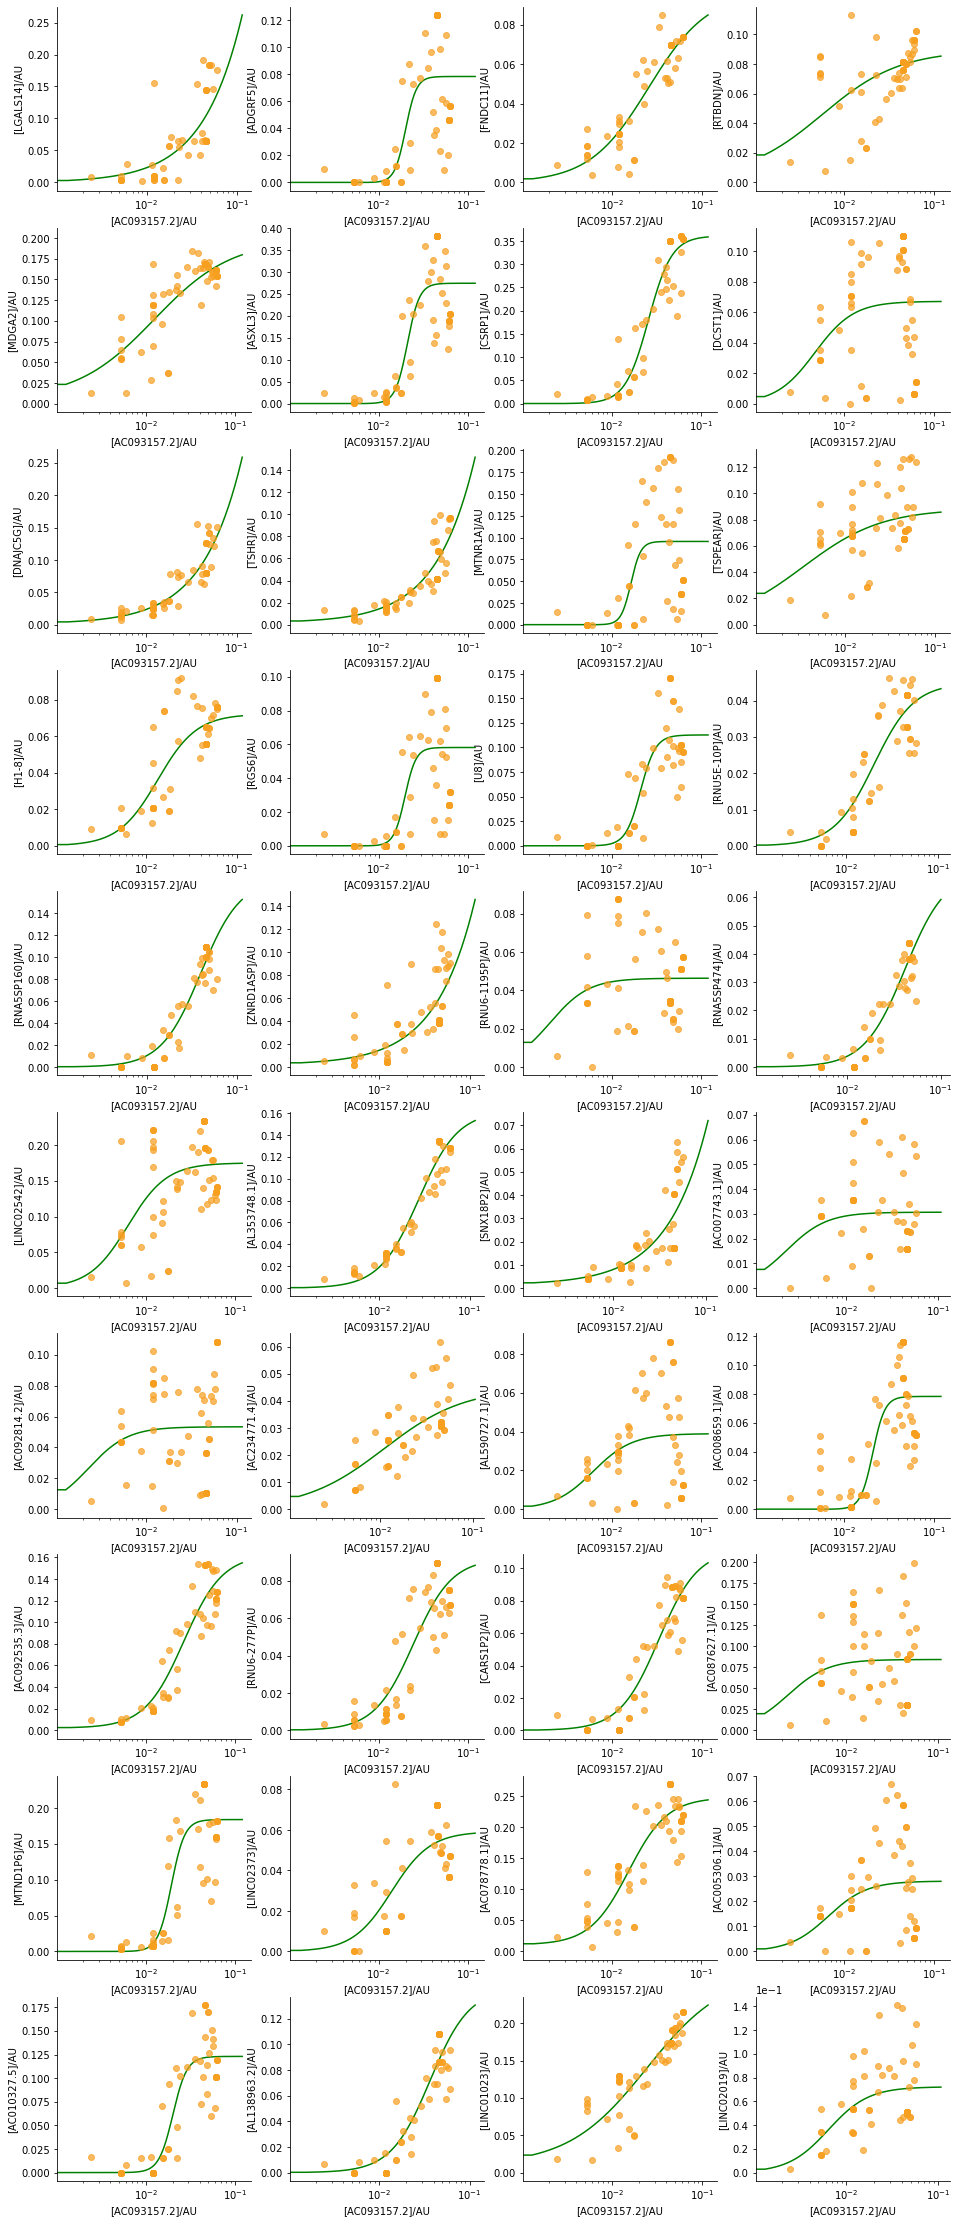

In [5]:
# plot

NCOL, SIZE = 4, 4
nplots = mat_reporter.shape[0]
nrow = int(np.floor(nplots / NCOL))

_, axes = plt.subplots(nrow, NCOL, figsize = (NCOL * SIZE, nrow * SIZE))
axes = axes.ravel()

count_x_all = mat_inducer.tolist()
inducer_name = logic_gates[logic_gates['id_inducer'] == id_inducer].iloc[0]['symbol_inducer']
i = 1
# becareful that iterrows() returns (index, row_Series)
for ax, (id_reporter, count_y_all) in zip(axes, mat_reporter.iterrows()):
    # remove outliers
    count_x, count_y = remove_outliers_2d(count_x_all, count_y_all)
    # Undo log-scale
    count_x, count_y = np.exp(count_x) - 1, np.exp(count_y) - 1
    r, _ = pearsonr(count_x, count_y)
    if r > 0:
        model_set = ModelSet.Activation_System
    else:
        model_set = ModelSet.Repression_System
    # fitting
    start_time = time.time()
    best_model, all_models = selectModel(count_x.reshape(-1, 1),
                            count_y,
                            modelSolver = ModelSolver.SLSQP,
                            modelSet = model_set,
                            parallel = False)
    elapsed = time.time() - start_time
    best_model_specs = [spec.name for spec in best_model.modelSpecs]
    print("Pair No.", i)
    print("Best model keywords:", best_model_specs)
    print("Best model AIC:", best_model.IC)
    print("Best model parameters:", 
          {key: val for key, val in zip(best_model.thetaKey, best_model.thetaVal)})
    print("Time elapse:", elapsed)
    
    reporter_name = logic_gates[logic_gates['id_reporter'] == id_reporter.split('.')[0]].iloc[0]['symbol_reporter']
    plotHelper(count_x.reshape(-1, 1), count_y, best_model,
            inducer_name = inducer_name, reporter_name = reporter_name,
            ax = ax,
            logScale = True,
            markersize = 6)
    i += 1